<a href="https://colab.research.google.com/github/MitzonRaj/rain-prediction/blob/main/rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
dataset = 'weatherAUS.csv'
rain = pd.read_csv(dataset)
confusion_matrix =pd.read_csv(dataset)

In [ ]:
print(rain.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
print(rain.shape)

(145460, 23)


In [ ]:
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
print(rain.describe(exclude=[object]))

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [ ]:
print(rain.describe(include=[object]))

              Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


In [ ]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [ ]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [ ]:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [ ]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

In [ ]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [ ]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

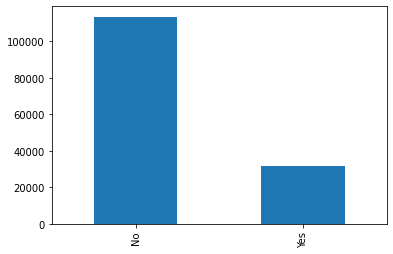

In [ ]:
rain['RainTomorrow'].value_counts().plot(kind='bar')

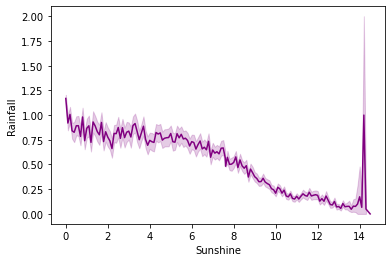

In [ ]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='purple')

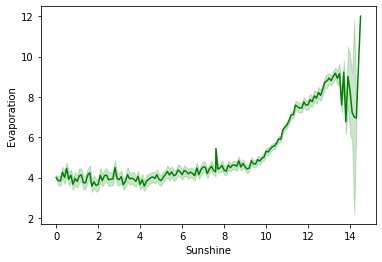

In [ ]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='green')

In [ ]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

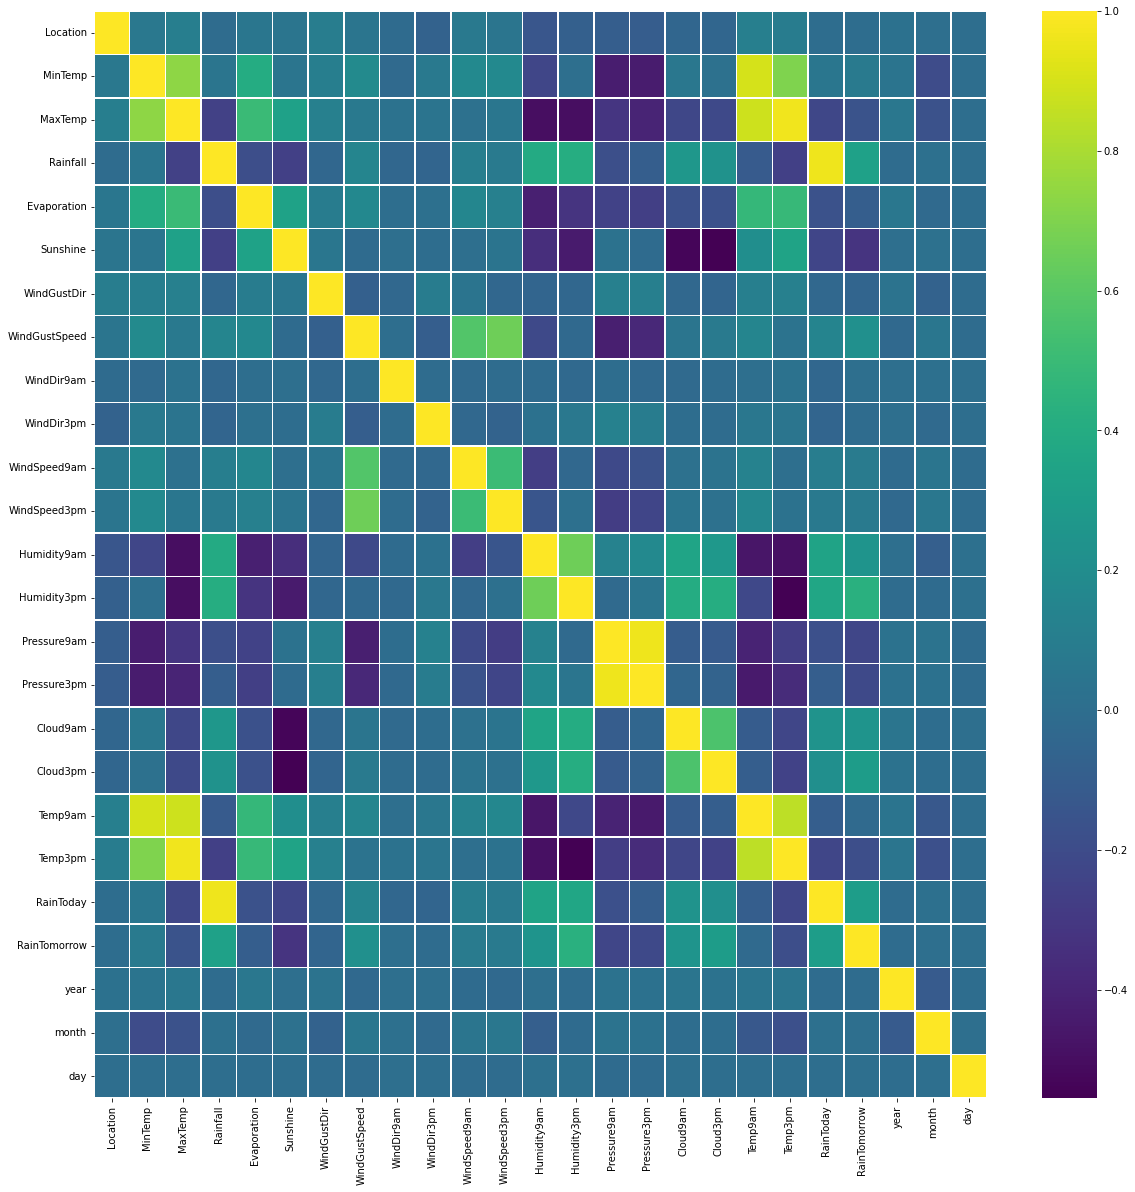

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

In [ ]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.0347039 , 0.03007181, 0.02870974, 0.03672632, 0.02331037,
       0.04322292, 0.02989387, 0.05682682, 0.03058656, 0.03173447,
       0.03095032, 0.03242073, 0.03757279, 0.20845808, 0.03581254,
       0.05026565, 0.02396042, 0.03443434, 0.02817892, 0.0281145 ,
       0.05036883, 0.03077655, 0.03043778, 0.03246175])

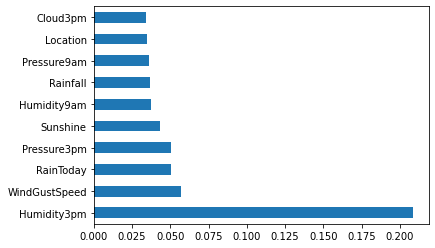

In [ ]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


In [ ]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


In [ ]:
dataset = 'weatherAUS.csv'
confusion_matrix =pd.read_csv(dataset)

In [ ]:
print(confusion_matrix(y_test,y_pred))

TypeError: ignored

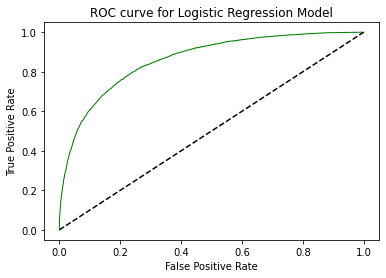

In [ ]:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]
Average cross-validation score: 0.8433847578355673


In [ ]:
import pickle

with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # here scaler is an object of StandardScaler class.

In [ ]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file) # here classifier_logreg is trained model